<a href="https://colab.research.google.com/github/yogithamekala/Reproducibilty/blob/main/TerminationDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load the Dataset**


In [7]:
# Load dataset
url = 'https://raw.githubusercontent.com/yogithamekala/Reproducibilty/main/MFG10YearTerminationData.csv'
column_names = ['EmployeeID', 'Recorddate_key', 'Birthdate_key', 'orighiredate', 'terminationdate_key', 'age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short', 'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT']
data = pd.read_csv(url, names=column_names)
data.head()

<ipython-input-7-b0c799efe98d>:4: DtypeWarning: Columns (0,5,6,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, names=column_names)


,EmployeeID,Recorddate_key,Birthdate_key,orighiredate,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
1,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
2,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
3,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
4,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE


In [3]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=data)

https://docs.google.com/spreadsheets/d/1cuQTqtVFX3QAL3Dsx8rRmDuhAIQlnyztld5YYiATYNU#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


**Data Preprocessing**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
# Load dataset
url = 'https://raw.githubusercontent.com/yogithamekala/Reproducibilty/main/MFG10YearTerminationData.csv'
column_names = ['EmployeeID', 'Recorddate_key', 'Birthdate_key', 'SkinThickness', 'orighiredate', 'terminationdate_key', 'age', 'length_of_service', 'city_name', 'department_name', 'job_title', 'store_name', 'gender_short', 'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT']
data = pd.read_csv(url, names=column_names)

# Convert the date column to datetime format
data['terminationdate_key'] = pd.to_datetime(data['terminationdate_key'], errors='coerce') # handle errors

# Extract year, month, and day from the date
data['year'] = data['terminationdate_key'].dt.year
data['month'] = data['terminationdate_key'].dt.month
data['day'] = data['terminationdate_key'].dt.day

# Drop the original date column
data = data.drop(columns=['terminationdate_key'])

# Encoding categorical variables
label_encoder = LabelEncoder()
data['target_column'] = label_encoder.fit_transform(data['STATUS'])

# Encode other categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Convert the column to string type before encoding
    data[col] = data[col].astype(str)
    data[col] = label_encoder.fit_transform(data[col])

# Splitting features and target
X = data.drop(columns=['target_column'])
y = data['target_column']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<ipython-input-9-8a40a27230fc>:10: DtypeWarning: Columns (0,5,6,10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, names=column_names)
<ipython-input-9-8a40a27230fc>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['terminationdate_key'] = pd.to_datetime(data['terminationdate_key'], errors='coerce') # handle errors
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1050: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1055: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1075: RuntimeWarning: invalid value encountered in divide
  new_unnormalized

**Build and train the deep learning model**

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Building the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification; use 'softmax' for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


994/994 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.9415e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 5.6164e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 1.4847e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 4.0691e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 2.4418e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 7.7839e-05 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 6.2255e-06 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/50
994/994 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 7.3952e-05 - loss: nan - val_accuracy

**Evaluate the Model**

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy:.2f}')

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan
Accuracy: 0.00


**Visualising the Training History**

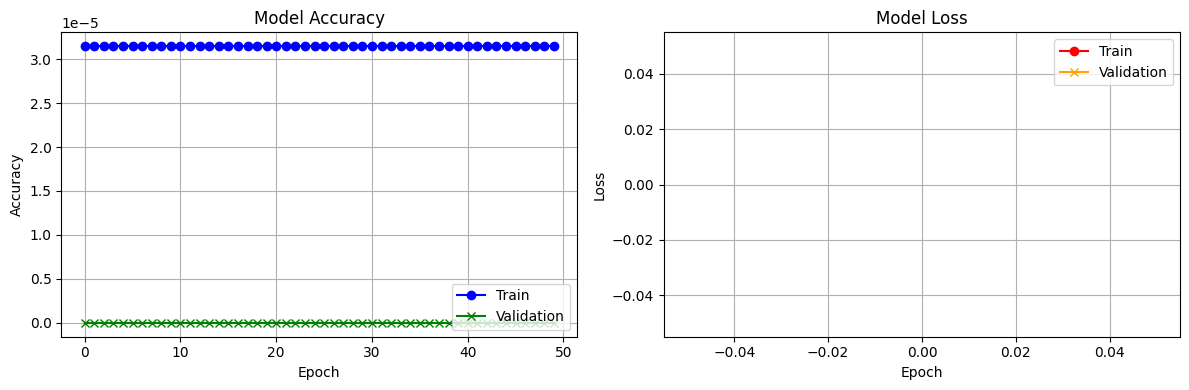

In [12]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], marker='o', color='blue')
plt.plot(history.history['val_accuracy'], marker='x', color='green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], marker='o', color='red')
plt.plot(history.history['val_loss'], marker='x', color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**Visualising the Confusion Matrix**

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


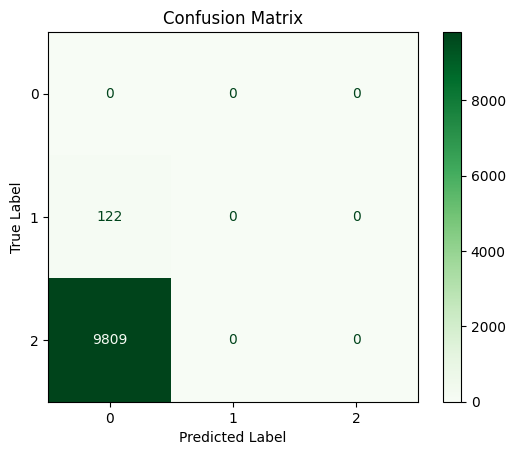

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicting the labels on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Greens, colorbar=True)  # Changed colormap and added colorbar
plt.title('Confusion Matrix')  # Added title
plt.xlabel('Predicted Label')  # Added x-axis label
plt.ylabel('True Label')       # Added y-axis label
plt.show()
